Numerical and data analysis

In [1]:
import numpy as np
import pandas as pd

Data Visualization

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import statistics

Supress warning in output

In [4]:
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [5]:
df = pd.read_csv("titanic_dataset.csv")

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


always create dictionary for dataset

problem statment: what are the factors affecting the survival of passenger

In [7]:
df.shape

(891, 12)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
#percentage of missing value in each column

100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

droping column

In [12]:
df1 = df.drop("Cabin",axis=1)

In [13]:
100*df1.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

### imputation of numerical data
#### numerical column - mean/median (median is prefered as it is least affected with outliers)
#### categorical column - mode

In [14]:
arr = np.array([1,2,3,4,5])
print("Mean:",np.mean(arr))
print("Median:",np.median(arr))

Mean: 3.0
Median: 3.0


In [15]:
arr1 = np.array([1,2,3,4,5,100])
print("Mean:",np.mean(arr1))
print("Median:",np.median(arr1))

Mean: 19.166666666666668
Median: 3.5


replace missinf value with median value

In [16]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)

In [17]:
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

droping row

for less missing data we can impute data by using mode or remove rows

In [18]:
# droping row
df2=df1[df1["Embarked"].notna()]
df2.shape

(889, 11)

In [19]:
df2.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [20]:
# using mode
mod=df1["Embarked"].mode()[0]
df1["Embarked"]=df1["Embarked"].fillna(mod)

In [21]:
df1.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [22]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


## Segmentation
it is opitional in data analysis

In [24]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [25]:
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
num_cols=["Age","Fare"]
extra_cols=["PassengerId","Name","Ticket"]

one doubt on category data. taking hypothetical ex of cricket. if I have lower and higher strike rate of batsman and actual strike rate of batsman is between this high and low. then will lower and higher strike range range come as num data or category data

## Univariate Analysis
Numberical

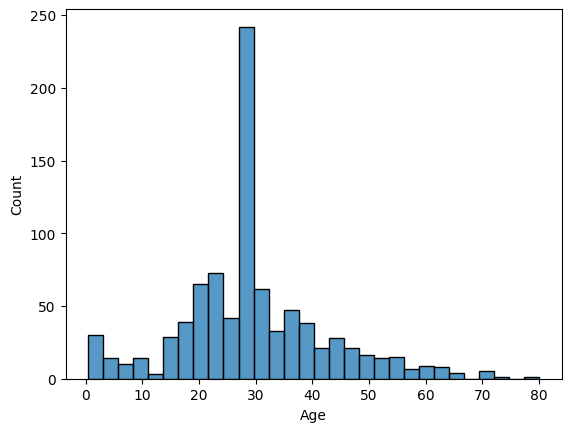

In [26]:
sns.histplot(x=df1["Age"])
plt.show()

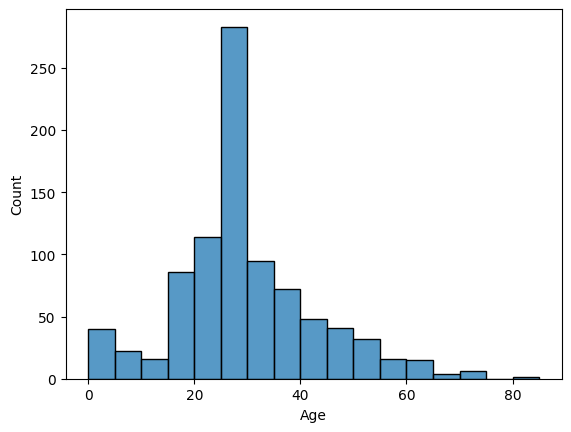

In [27]:
sns.histplot(x=df1["Age"],bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
plt.show()

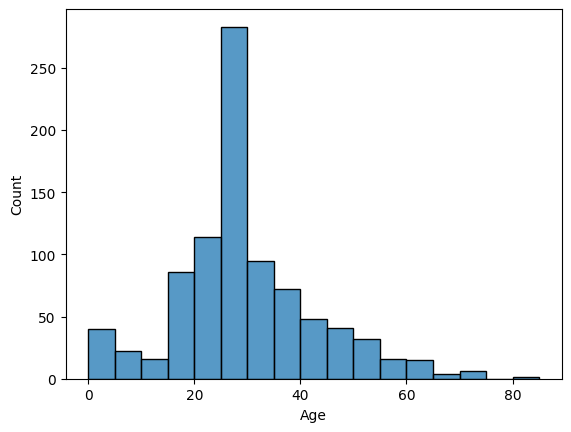

In [28]:
sns.histplot(x=df1["Age"],bins=range(0,90,5))
plt.show()

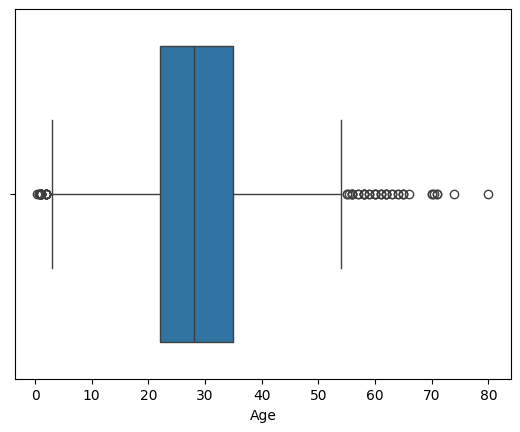

In [29]:
sns.boxplot(x=df1["Age"])
plt.show()

# quartiles = quarter + percentiles
#Q1 - 25%. Q2 - 50%. Q3 - 75%
#Upper boundary = Q3 + 1.5 * (Q3-Q1)
#Lower boundry = Q1 - 1.5 *(Q3-Q1)

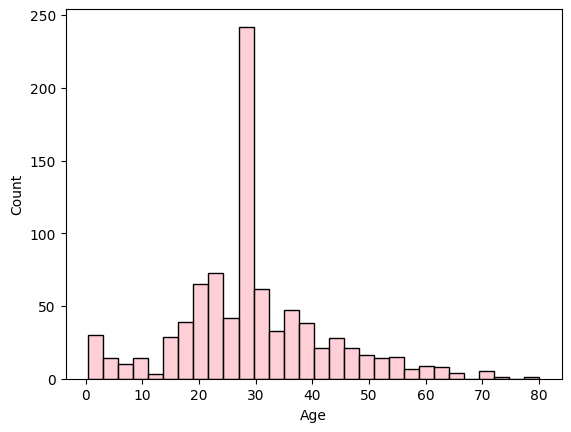

In [30]:
sns.histplot(x=df1["Age"],color="Pink")
plt.show()

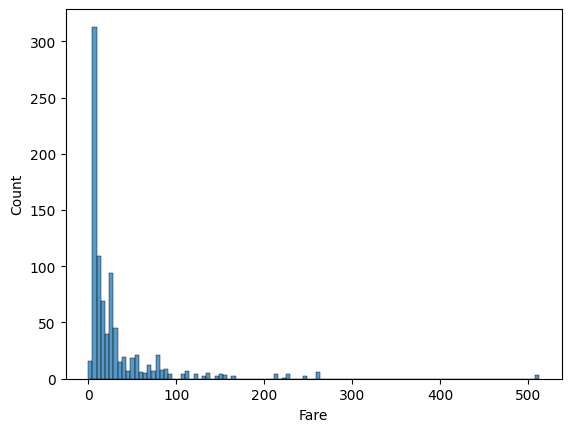

In [31]:
sns.histplot(x=df1["Fare"])
plt.show()

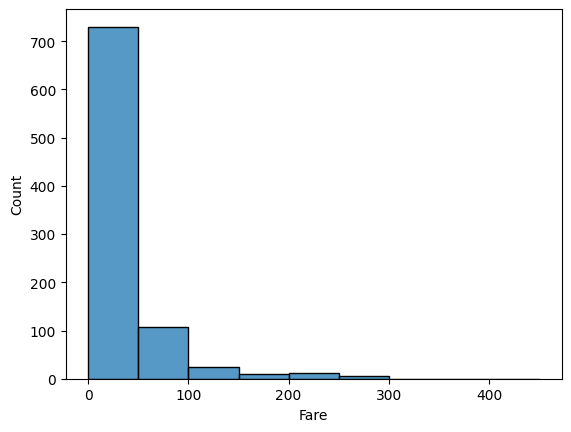

In [32]:
sns.histplot(x=df1["Fare"],bins=range(0,500,50))
plt.show()

## Bivariate analysis
two coloums analysis

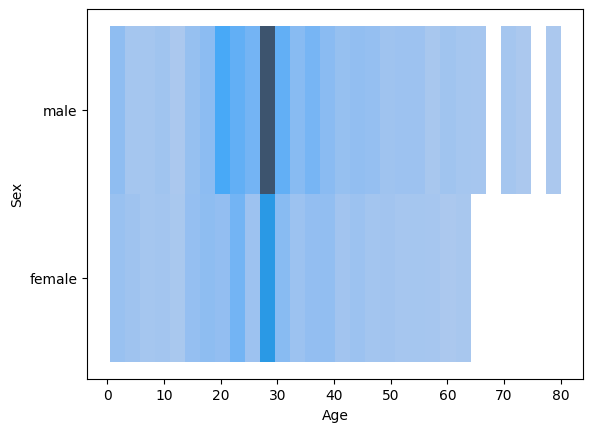

In [33]:
sns.histplot(x=df1["Age"],y=df1["Sex"])
plt.show()

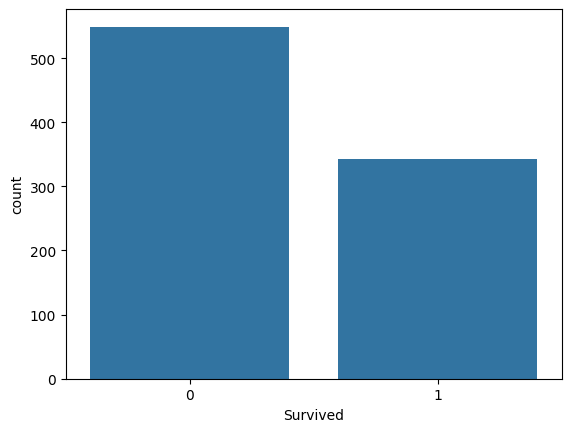

In [34]:
sns.countplot(x=df1["Survived"])
plt.show()

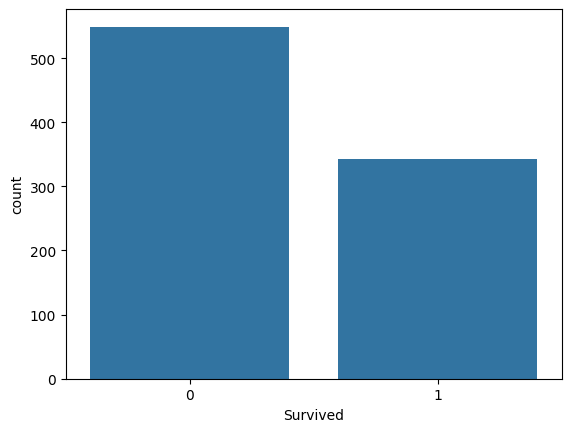

In [35]:
sns.countplot(x=df1["Survived"])
plt.show()

Countplot of Survived


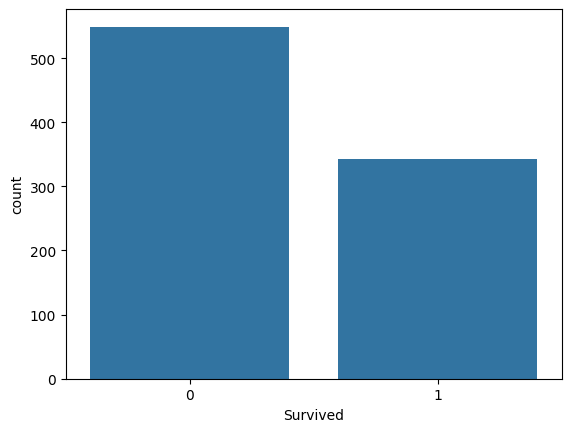

Countplot of Pclass


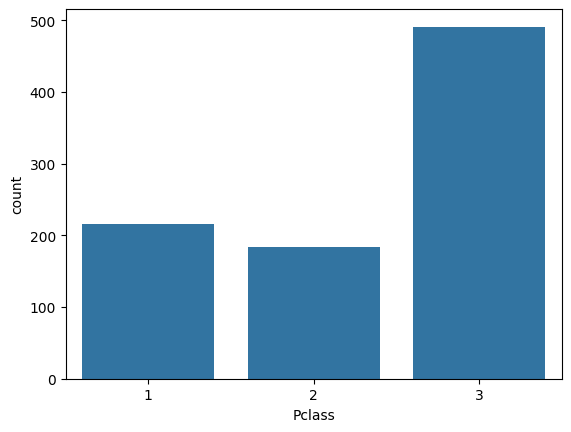

Countplot of Sex


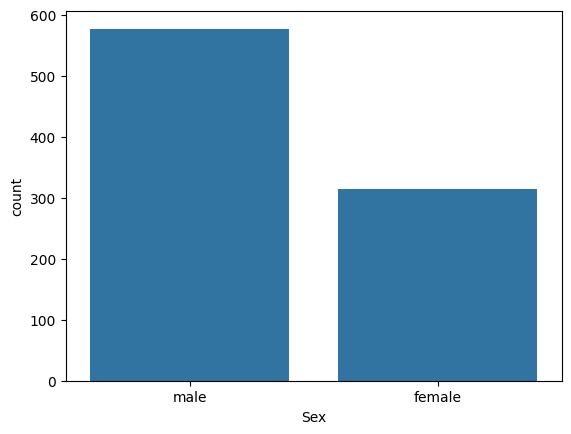

Countplot of SibSp


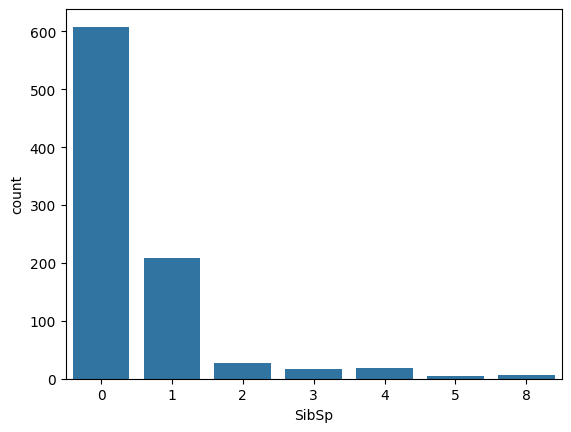

Countplot of Parch


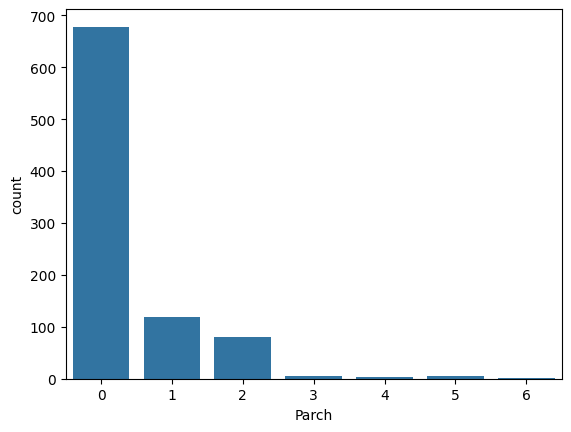

Countplot of Embarked


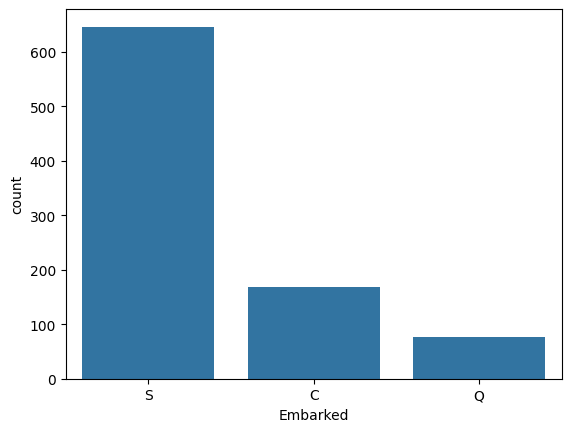

In [36]:
for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(x=df1[i])
    plt.show()

In [37]:
y=df1["Pclass"].value_counts(normalize = True).values
names=df1["Pclass"].value_counts(normalize = True).index

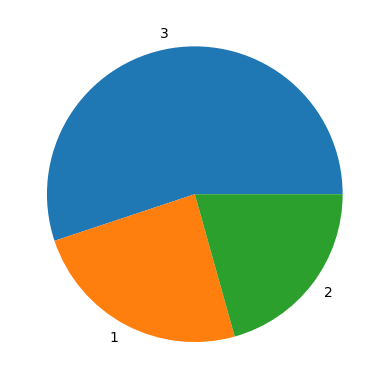

In [38]:
plt.pie(y,labels=names)
plt.show()

---------- Survived ----------


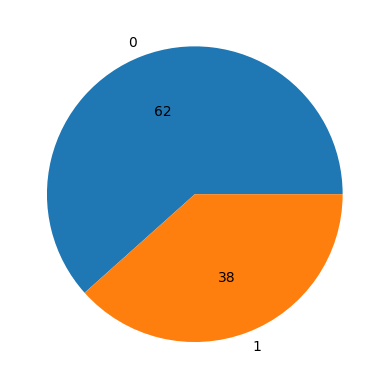

---------- Pclass ----------


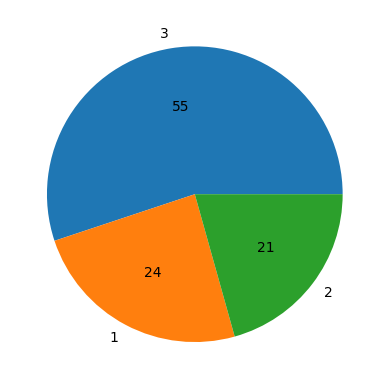

---------- Sex ----------


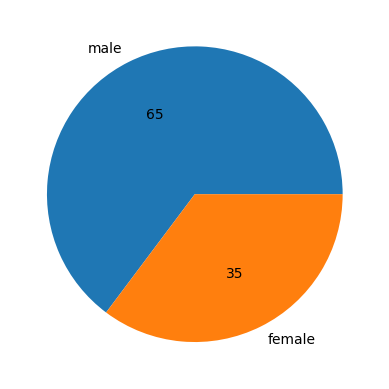

---------- SibSp ----------


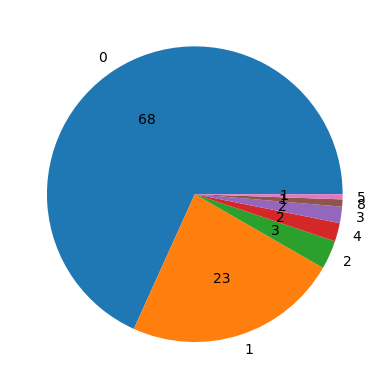

---------- Parch ----------


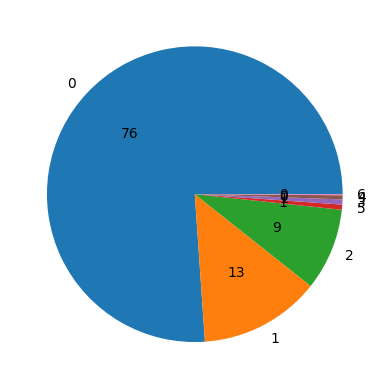

---------- Embarked ----------


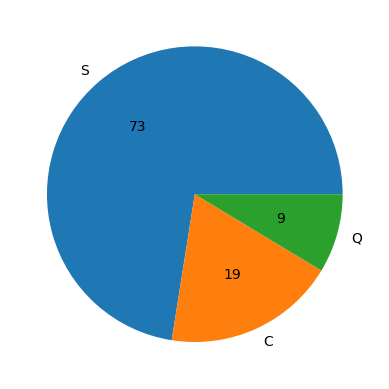

In [39]:
for j in cat_cols:
    print("----------",j,"----------")
    y=df1[j].value_counts(normalize = True).values
    names=df1[j].value_counts(normalize = True).index
    plt.pie(y, labels=names, autopct="%.f")
    plt.show()

## bivariate analysis
numberical vs numberical

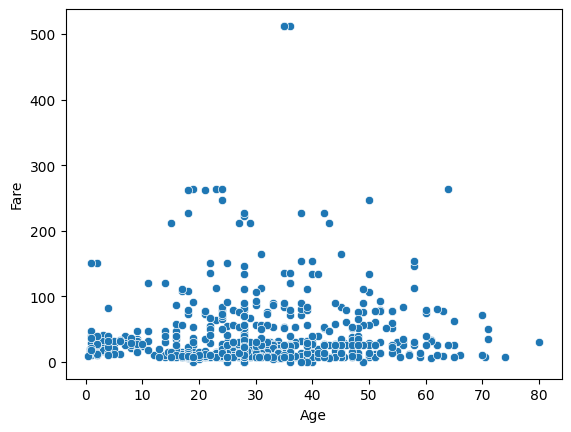

In [40]:
sns.scatterplot(x=df1["Age"],y=df1["Fare"])
plt.show()

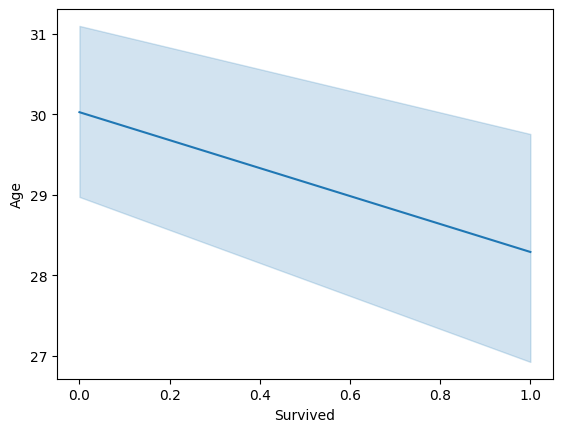

In [41]:
sns.lineplot(y=df1["Age"],x=df1["Survived"])
plt.show()

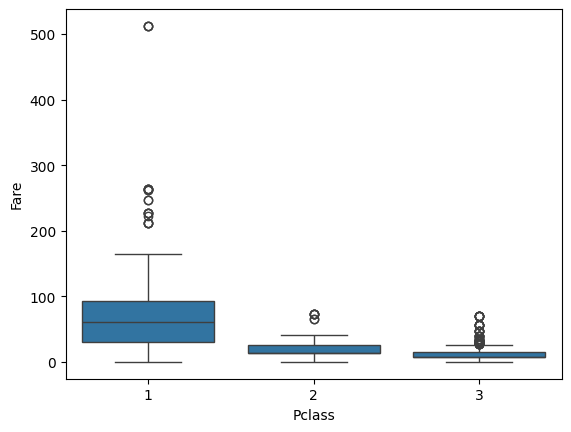

In [42]:
sns.boxplot(x=df1["Pclass"],y=df1["Fare"])
plt.show()

Boxplot of Survived vs Age


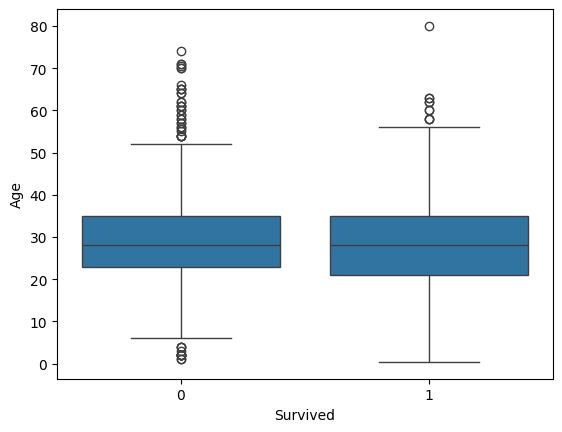

Boxplot of Survived vs Fare


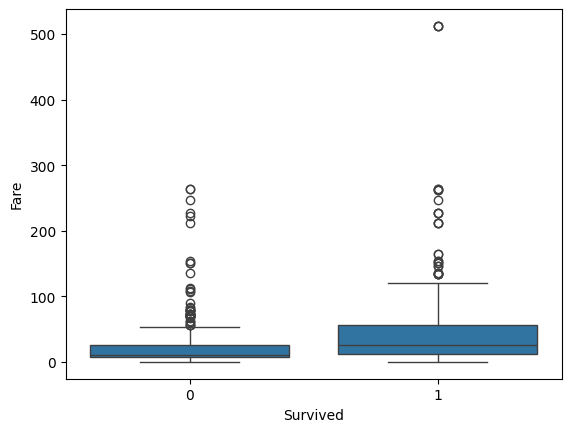

Boxplot of Pclass vs Age


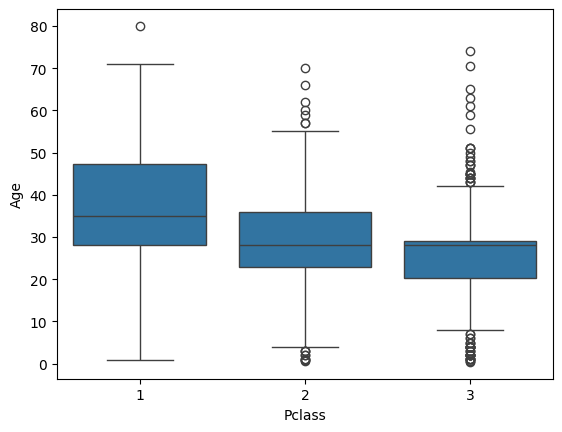

Boxplot of Pclass vs Fare


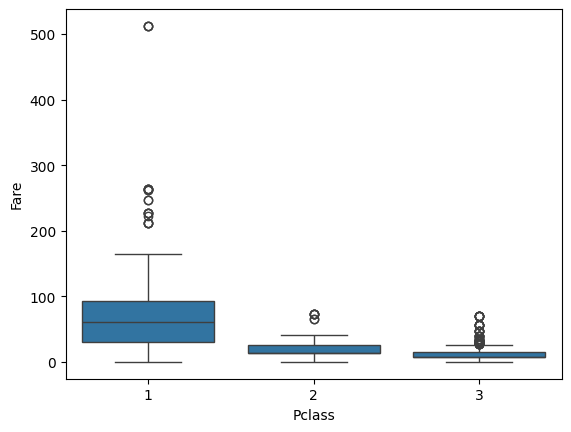

Boxplot of Sex vs Age


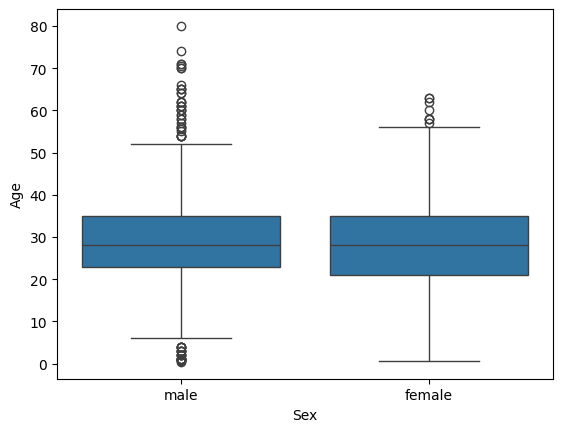

Boxplot of Sex vs Fare


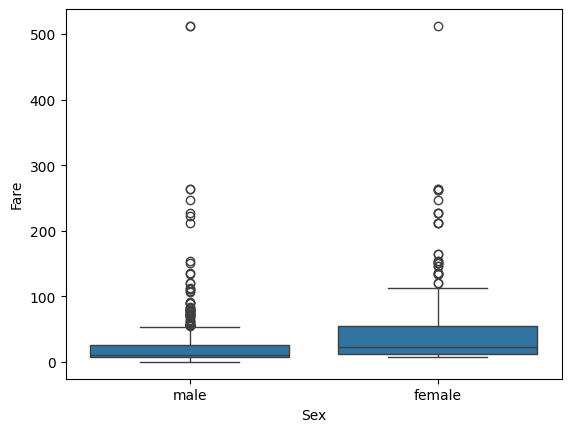

Boxplot of SibSp vs Age


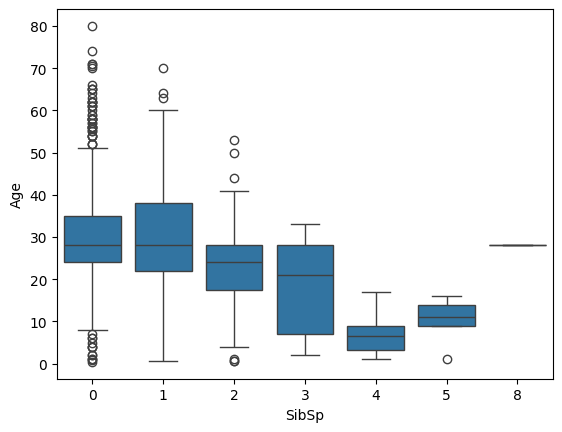

Boxplot of SibSp vs Fare


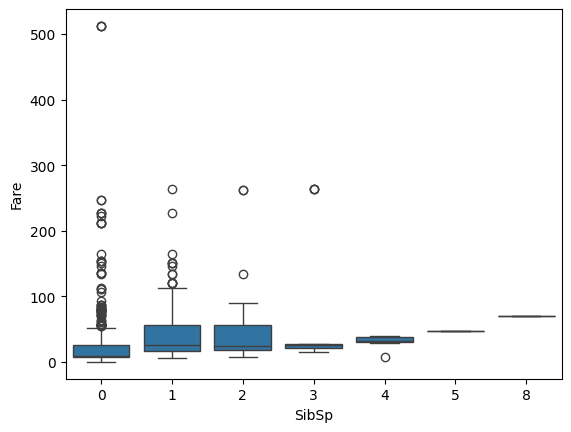

Boxplot of Parch vs Age


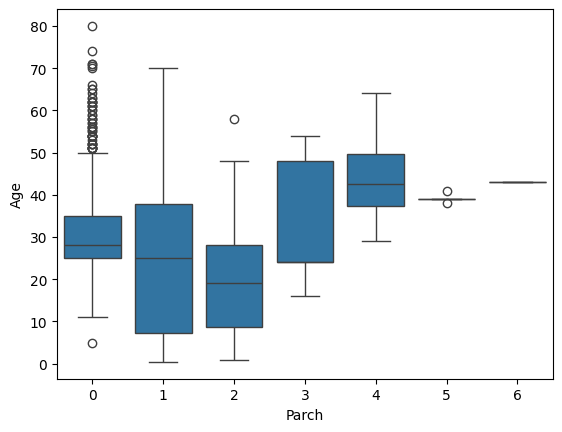

Boxplot of Parch vs Fare


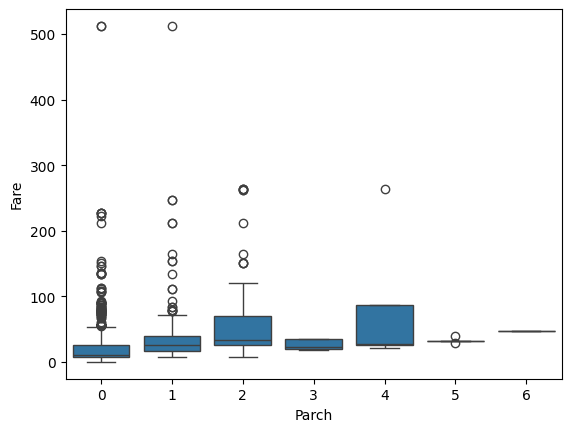

Boxplot of Embarked vs Age


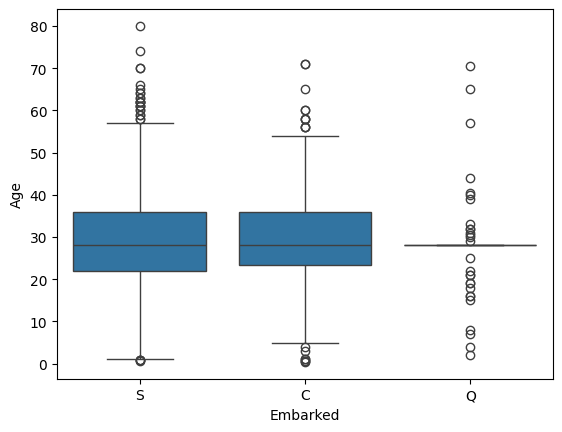

Boxplot of Embarked vs Fare


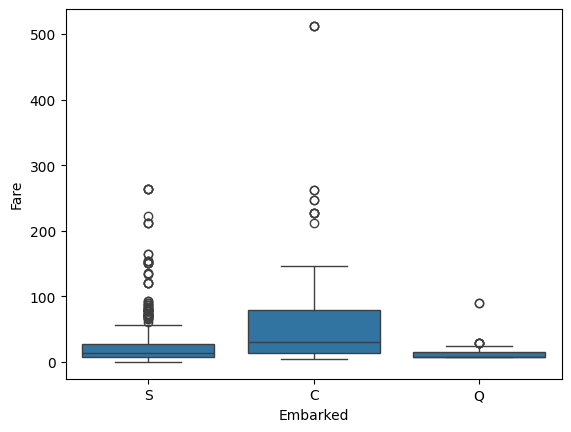

In [43]:
for col1 in cat_cols:
    for col2 in num_cols:
        print("Boxplot of", col1, "vs", col2)
        sns.boxplot(x=df1[col1],y=df1[col2])
        plt.show()

## bivariate
Categorical vs categorical

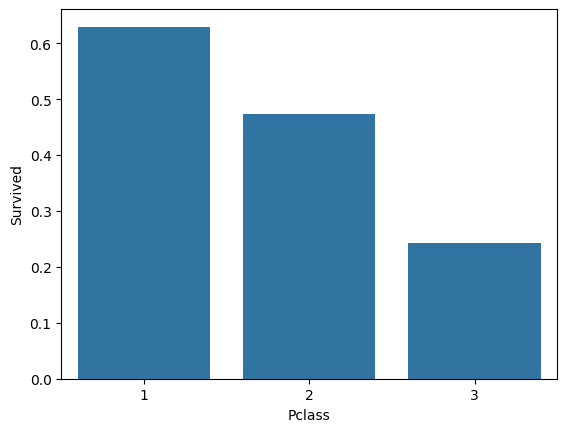

In [44]:
sns.barplot(x=df1["Pclass"],y=df1["Survived"],ci=None)
plt.show()

## Multivariate analysis

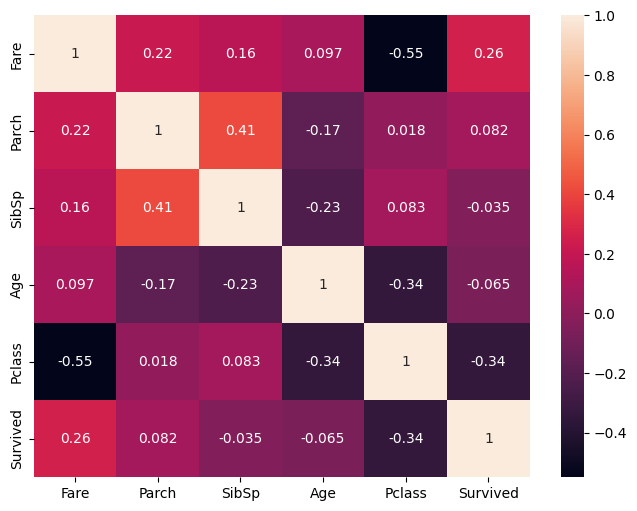

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df1[["Fare","Parch","SibSp","Age","Pclass","Survived"]].corr(),annot=True)
plt.show()

In [46]:
numbers = [12, 22, 33.66, 44, 77.8]
output = all(type(value) == "int" for value in numbers)
print(output)

False


In [47]:
cube_list = []
num_list = [12, 27, 33, 44, 55]

# for value in num_list:
#    if value % 2 == 0:
#        cube_list.append(value ** 3)

cube_list = [value ** 3 for value in num_list if value % 2 == 0   ]  
print(cube_list)

[1728, 85184]


In [48]:
output = lambda x: 'Adult' if x > 18 else 'Teenager' 

print(output(22)) # function_call_1
print(output(15)) # function_call_2

Adult
Teenager


In [49]:
import time
sqrd_numbers = []

# Case_1
start_time = time.time()
for i in range(100000000):
    sqrd_numbers.append(i ** 2)
print('For loops: {}'.format(time.time() - start_time))

sqrd_number = []

# Case_2
start_time = time.time()
sqrd_number_2 = [(i ** 2) for i in range(100000000)]
print('List Comprehension: {}'.format(time.time() - start_time))

For loops: 21.987288236618042
List Comprehension: 15.030516862869263


pylink\
flake8\
mypy\
pyodestyle\
prospector\
pylama

In [50]:
array = [12, 22, 33, 44, 55]
count = 0
while count <= len(array):
    print(array[count])
    count += 1

12
22
33
44
55


IndexError: list index out of range

In [51]:
print('Execution starts')

try:
    num_list = [12, 33, 44, 55]
    for values in num_list:
        print(values)

print('Execution ends')

SyntaxError: expected 'except' or 'finally' block (1483419811.py, line 8)

In [52]:
def random_function():
    try:
        print('This is Line_1')
        result = 5 / 0
        print('This is Line_3')
    
    except ZeroDivisionError as z_e:
        print('Divisible by zero')

In [53]:
marks = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GZVBQG5pzJeNaL1ve50Rv9YNV/class-grades.csv')
print(marks.isnull().sum()) #Type your answer here)

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64


In [54]:
marks.shape

(99, 6)

In [55]:
marks = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/VodvGKvJAaeNrG7kvOQV38aog/class-grades.csv')

marks = marks.dropna(thresh=len(marks.columns)-5+1) #Type your code here to remove rows with missing value equal to 5
print(marks.isnull().sum()) #Type your code here to get sum of missing values in each column)

Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64


In [56]:
ten = pd.read_csv("tendulkar_ODI.csv")

In [57]:
ten.head(2)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90


In [58]:
ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   Runs        295 non-null    object
 2   Mins        295 non-null    object
 3   BF          295 non-null    object
 4   4s          295 non-null    object
 5   6s          295 non-null    object
 6   SR          295 non-null    object
 7   Pos         295 non-null    object
 8   Dismissal   295 non-null    object
 9   Inns        295 non-null    object
 10  Opposition  295 non-null    object
 11  Ground      295 non-null    object
 12  Start Date  295 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.1+ KB


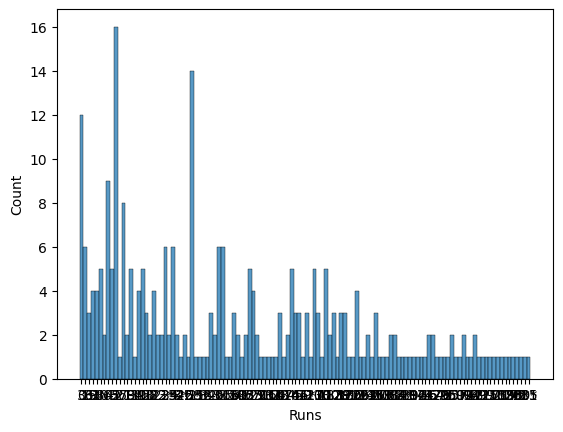

In [59]:
sns.histplot(x="Runs", bins=range(0,300,10), data=ten)
plt.show()

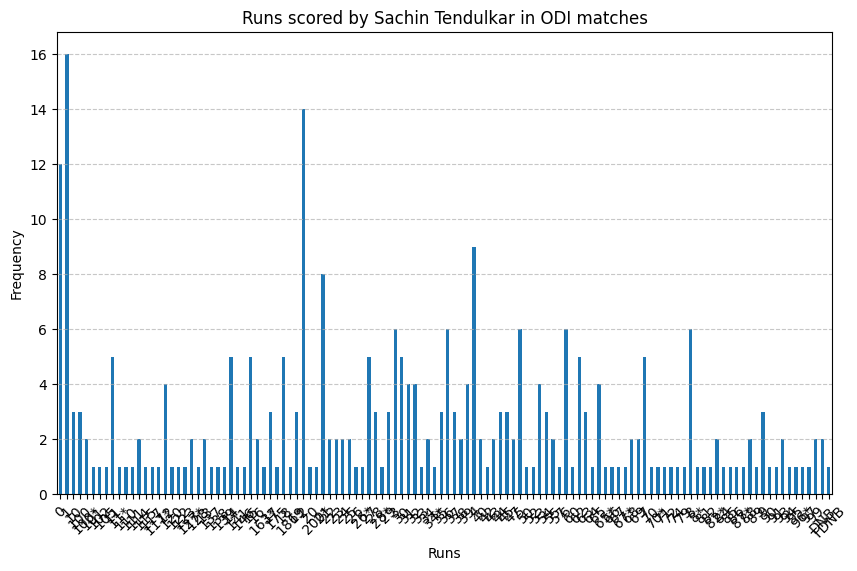

Sachin Tendulkar has scored runs most often in the bucket: 1


In [60]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust size if needed
ten['Runs'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Runs scored by Sachin Tendulkar in ODI matches')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

# Find the bucket with the highest frequency
most_often_runs = ten['Runs'].value_counts().idxmax()
print("Sachin Tendulkar has scored runs most often in the bucket:", most_often_runs)

In [61]:
sns.histplot(x=["4s"],data=ten)
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 295 and the vector passed to `x` has length 1.

In [62]:
fours = ten[ten['Runs'] == 4]
if not fours.empty:
    # Plot the histogram
    plt.figure(figsize=(10, 6))  # Adjust size if needed
    plt.hist(fours['4s'], bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
    plt.xlabel('Number of 4s')
    plt.ylabel('Frequency')
    plt.title('Histogram of 4s Hit by Tendulkar')
    plt.grid(True)
    plt.show()

    # Find the most common value of 4s
    most_common_value = fours['4s'].mode()[0]
    print("The most common value of the number of 4s hit by Tendulkar is:", most_common_value)
else:
    print("No data found for 4s hit by Ten")

No data found for 4s hit by Ten


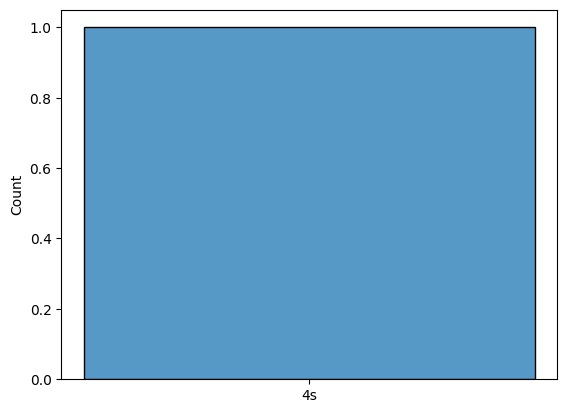

In [63]:
sns.histplot(x=['4s'],bins=range(0,100,20))
plt.show()

In [64]:
# Check for missing values
missing_values = ten['Runs'].isnull().sum()

# Check for non-numeric values
non_numeric_values = pd.to_numeric(ten['Runs'], errors='coerce').isnull().sum()

# Check for inconsistent or anomalous values
# For example, you can check if there are any values that do not make sense in the context of the 'Runs' column

# Print the results
print("Number of missing values in 'Runs' column:", missing_values)
print("Number of non-numeric values in 'Runs' column:", non_numeric_values)

Number of missing values in 'Runs' column: 0
Number of non-numeric values in 'Runs' column: 23


In [65]:
col = "Runs"
col_con = pd.to_numeric(ten[col],errors='coerce')
non_col = col_con[col_con.isna()]

if non_col.empty:
    print("no non-int value")
else:
    print("non-int value")
    print(non_col)

non-int value
8     NaN
30    NaN
37    NaN
38    NaN
42    NaN
46    NaN
48    NaN
73    NaN
96    NaN
110   NaN
120   NaN
124   NaN
134   NaN
159   NaN
168   NaN
171   NaN
209   NaN
232   NaN
233   NaN
258   NaN
266   NaN
277   NaN
280   NaN
Name: Runs, dtype: float64


In [103]:
media = pd.read_csv("popularity.csv")

In [104]:
media.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [105]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [106]:
100*media.isnull().median()

url                              0.0
 timedelta                       0.0
 n_tokens_title                  0.0
 n_tokens_content                0.0
 n_unique_tokens                 0.0
                                ... 
 title_subjectivity              0.0
 title_sentiment_polarity        0.0
 abs_title_subjectivity          0.0
 abs_title_sentiment_polarity    0.0
 shares                          0.0
Length: 61, dtype: float64

In [107]:
media.nunique()

url                              39644
 timedelta                         724
 n_tokens_title                     20
 n_tokens_content                 2406
 n_unique_tokens                 27281
                                 ...  
 title_subjectivity                673
 title_sentiment_polarity          813
 abs_title_subjectivity            532
 abs_title_sentiment_polarity      653
 shares                           1454
Length: 61, dtype: int64

medcat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
mednum_cols=["shares","Fare"]
medextra_cols=["url"]

for col1 in cat_cols:
    for col2 in num_cols:
        print("Boxplot of", col1, "vs", col2)
        sns.boxplot(x=df1[col1],y=df1[col2])
        plt.show()

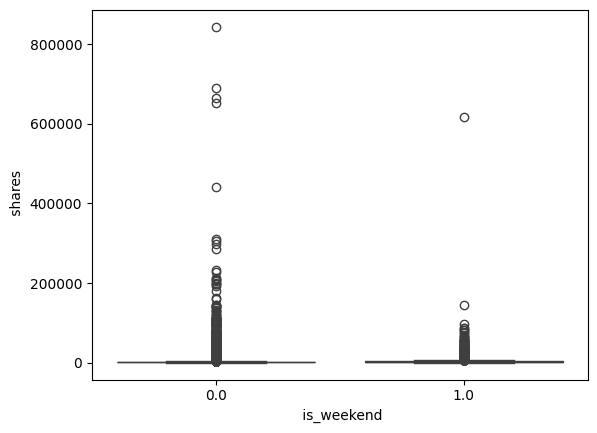

In [76]:
sns.boxplot(x=media[" is_weekend"],y=media[" shares"])
plt.show()

In [73]:
print(media.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Boxplot of  weekday_is_monday vs  shares


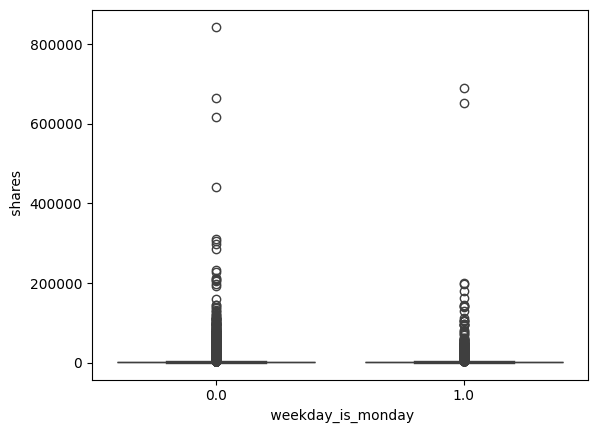

Boxplot of  weekday_is_tuesday vs  shares


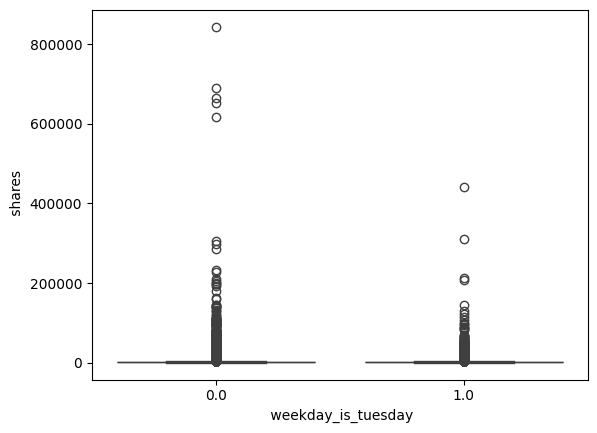

Boxplot of  weekday_is_wednesday vs  shares


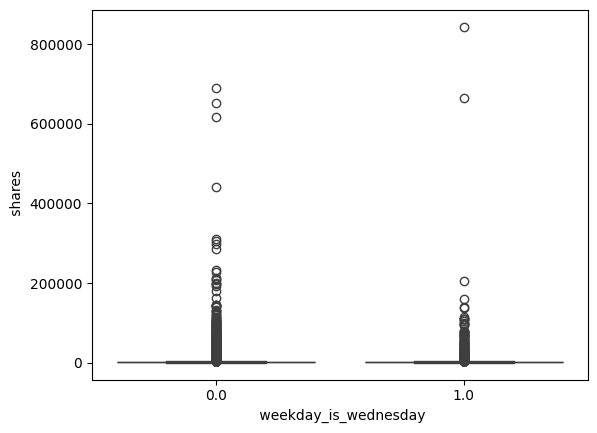

Boxplot of  weekday_is_thursday vs  shares


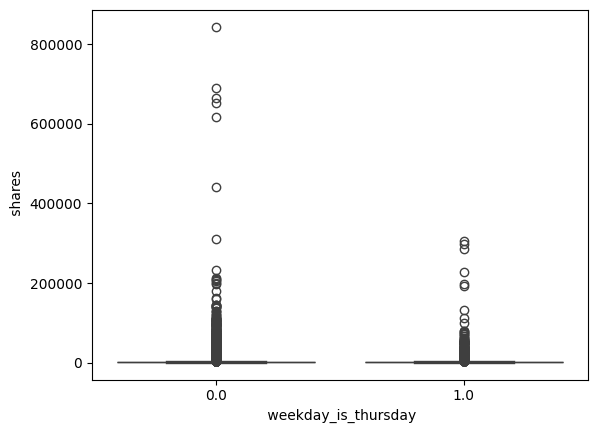

Boxplot of  weekday_is_friday vs  shares


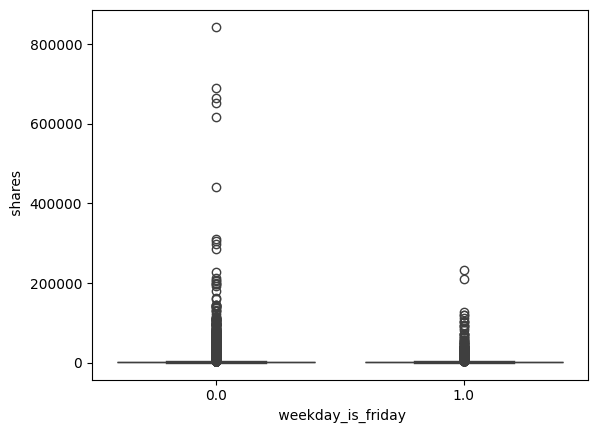

Boxplot of  weekday_is_saturday vs  shares


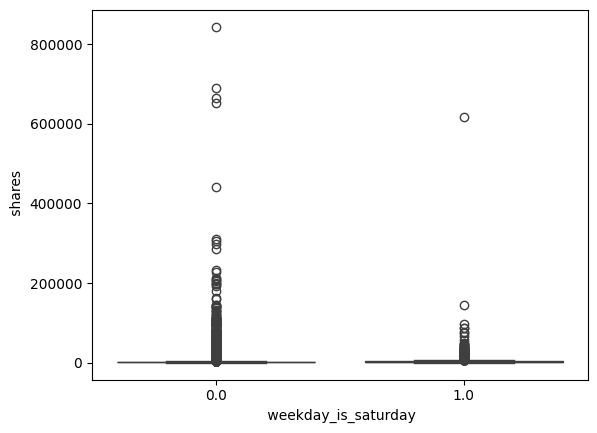

Boxplot of  weekday_is_sunday vs  shares


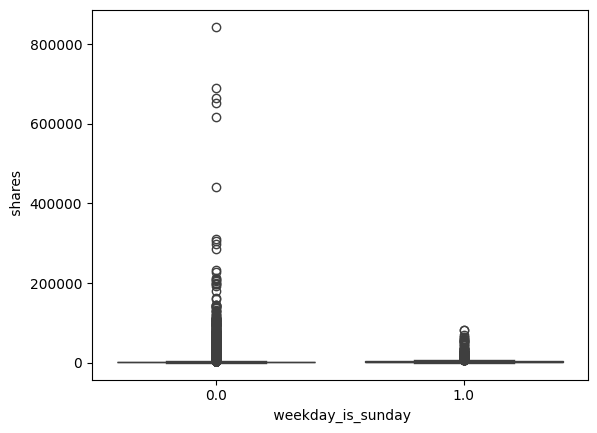

In [102]:
weekday = [" weekday_is_monday", " weekday_is_tuesday"," weekday_is_wednesday", " weekday_is_thursday"," weekday_is_friday", " weekday_is_saturday"," weekday_is_sunday"]
shares = [" shares"]

for col1 in weekday:
    for col2 in shares:
        print("Boxplot of", col1, "vs", col2)
        sns.boxplot(x=media[col1],y=media[col2])
        plt.show()

In [108]:
mod = media[" shares"].median()
print(mod)

1400.0


In [109]:
mod1 = media[' shares'].mean()
print(mod1)

3395.3801836343455


In [110]:
mod2 = media[" shares"].max()
print(mod2)

843300


In [119]:
percentile = [0.25,0.30, 0.40, 0.50, 0.6, 0.75, 0.78, 0.80]

share_col = media[" shares"]

percent_val = share_col.quantile(percentile)

print("percentile of share col")
for percentile, value in zip(percentile, percent_val):
    print(f"{percentile}th percentile: {value}")

percentile of share col
0.25th percentile: 946.0
0.3th percentile: 1000.0
0.4th percentile: 1200.0
0.5th percentile: 1400.0
0.6th percentile: 1800.0
0.75th percentile: 2800.0
0.78th percentile: 3100.0
0.8th percentile: 3400.0


In [120]:
share_col = media[" shares"]
print(share_col)

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64


In [127]:
sum1 = media[" shares"].sum()
print(sum1)

134606452


In [122]:
percentile_95 = share_col.quantile(0.95)
print(percentile_95)

10800.0


In [132]:
percet1 = (percentile_95*100/sum1)
round1 = round(percet1,2)
print(round1)

0.01


In [123]:
filtered_media = media[share_col <= percentile_95]
print("Filtered DataFrame after removing rows above the 95th percentile:")
print(filtered_media)

Filtered DataFrame after removing rows above the 95th percentile:
                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0     

In [124]:
filtered_media.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [125]:
mod5 = filtered_media[' shares'].mean()
print(mod5)

2074.334386533202


In [126]:
mod10 = filtered_media[' shares'].std()
print(mod10)

1871.8141388441672


In [133]:
nas = pd.read_csv("EDA_nas.csv")

In [134]:
nas.head(3)

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN


In [148]:
nas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STUID                   8801 non-null   int64  
 1   State                   8801 non-null   object 
 2   District                8801 non-null   int64  
 3   Gender                  8799 non-null   object 
 4   Age                     8569 non-null   object 
 5   Category                8232 non-null   float64
 6   Same.language           8572 non-null   float64
 7   Siblings                8801 non-null   object 
 8   Handicap                8304 non-null   object 
 9   Father.edu              8147 non-null   object 
 10  Mother.edu              7950 non-null   object 
 11  Father.occupation       7761 non-null   object 
 12  Mother.occupation       6626 non-null   object 
 13  Below.poverty           7347 non-null   object 
 14  Use.calculator          6646 non-null   

In [150]:
100*nas.isnull().mean()

STUID                 0.000000
State                 0.000000
District              0.000000
Gender                0.022725
Age                   2.636064
                       ...    
Help.in.household     0.499943
Maths..              52.391774
Reading..            51.971367
Science..            52.914442
Social..             53.198500
Length: 64, dtype: float64

In [138]:
uni = nas["Watch.TV"].unique()
print(uni)

['Every day' 'Once a week' 'Never' 'Once a month' nan]


In [145]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 599.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 1.7 MB/s eta 0:00:0000:0100:01


In [146]:
import statsmodels.api as sm

In [149]:
X = nas['Watch.TV']  # Predictor variable
y = nas['Science..']  # Target variable

# Add a constant to the predictor variable for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Boxplot of Father.edu vs Maths..


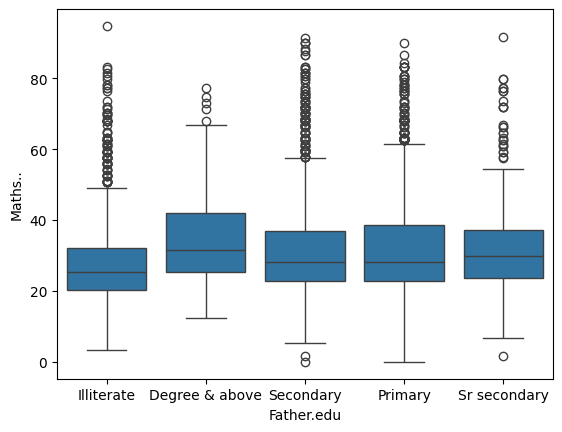

Boxplot of Father.edu vs Reading..


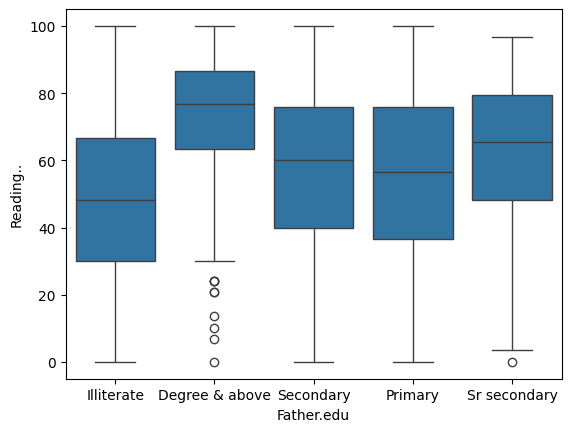

Boxplot of Father.edu vs Science..


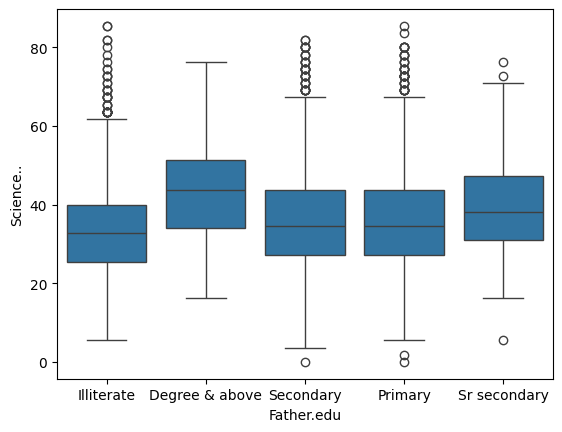

Boxplot of Father.edu vs Social..


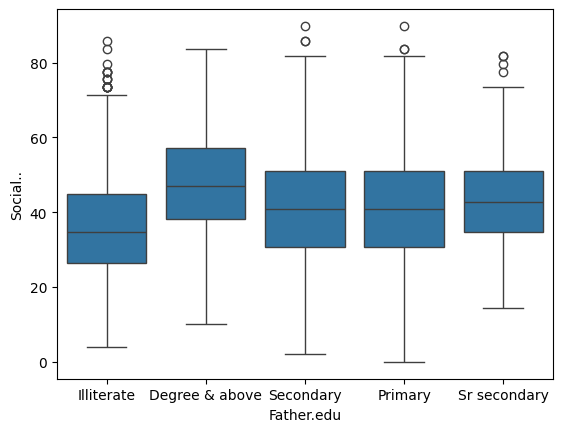

Boxplot of Mother.edu vs Maths..


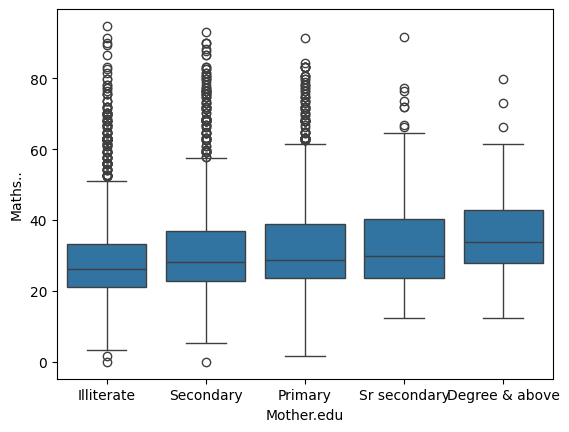

Boxplot of Mother.edu vs Reading..


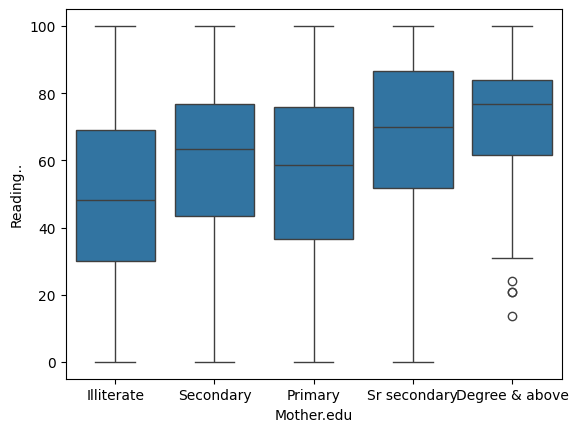

Boxplot of Mother.edu vs Science..


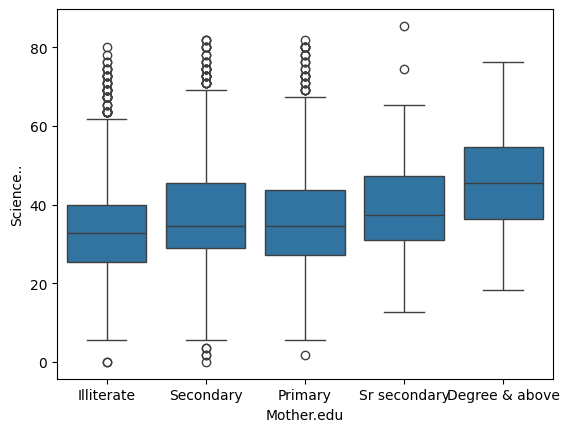

Boxplot of Mother.edu vs Social..


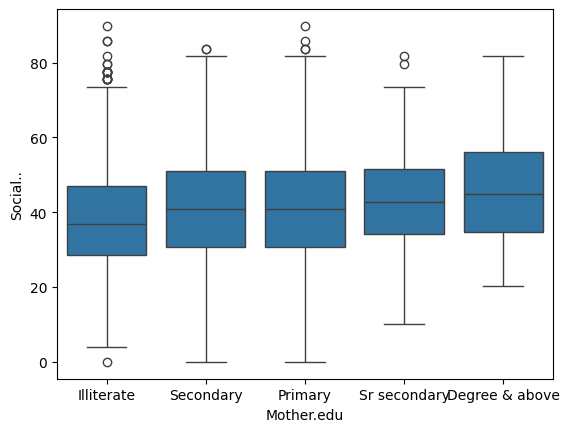

Boxplot of Father.occupation vs Maths..


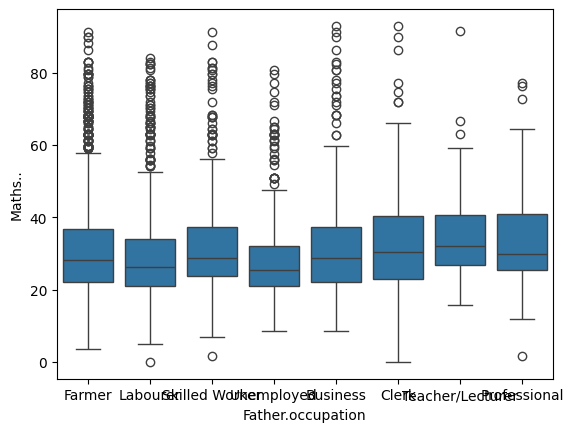

Boxplot of Father.occupation vs Reading..


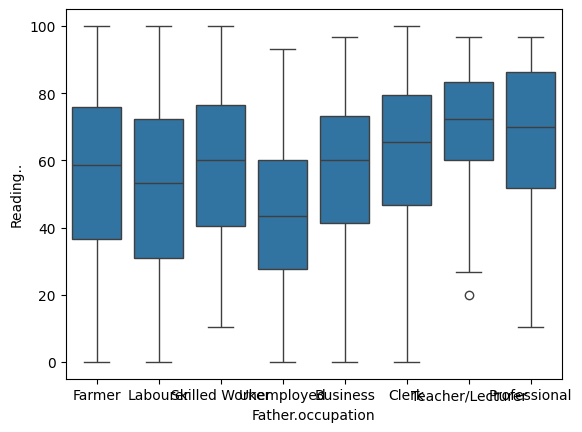

Boxplot of Father.occupation vs Science..


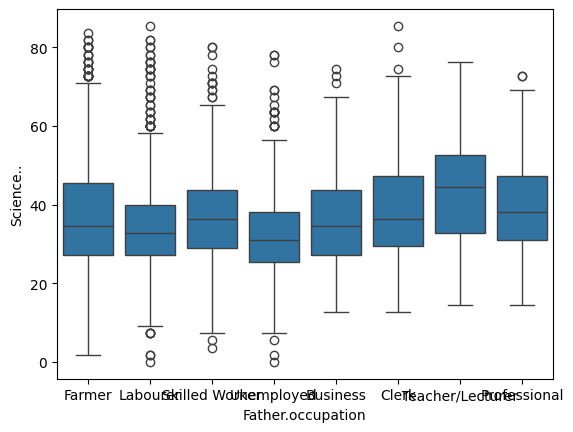

Boxplot of Father.occupation vs Social..


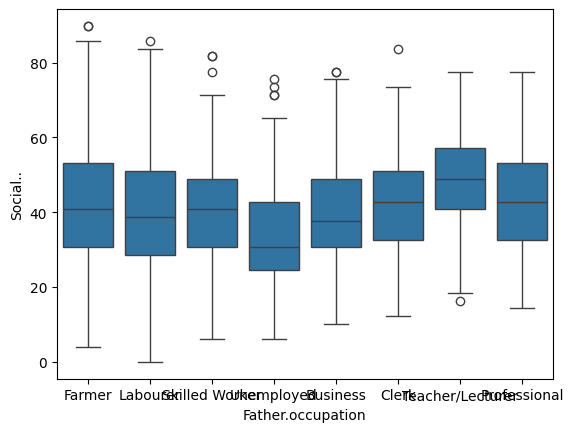

Boxplot of Mother.occupation vs Maths..


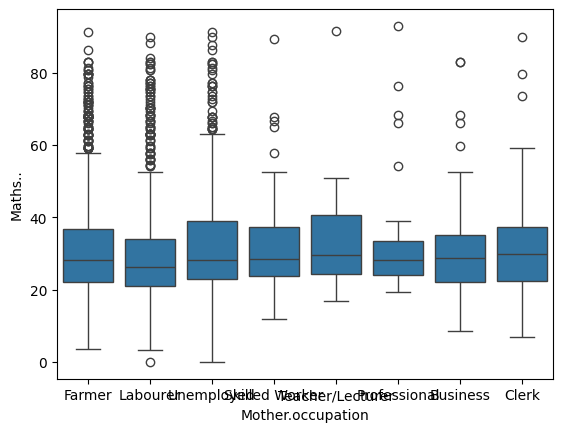

Boxplot of Mother.occupation vs Reading..


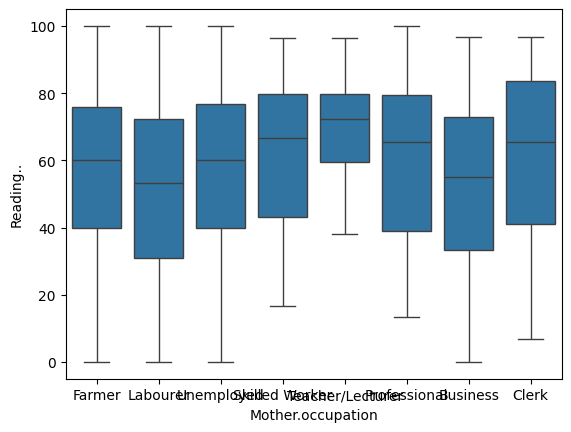

Boxplot of Mother.occupation vs Science..


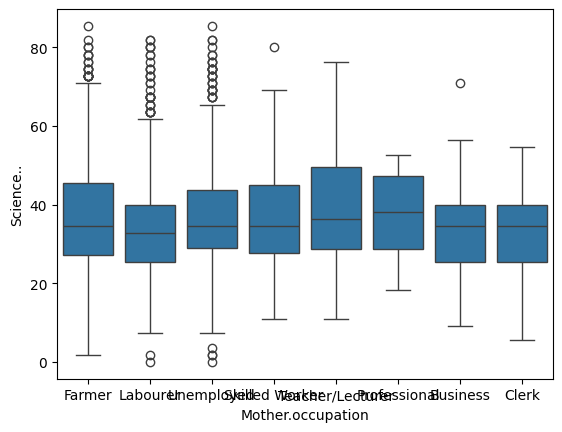

Boxplot of Mother.occupation vs Social..


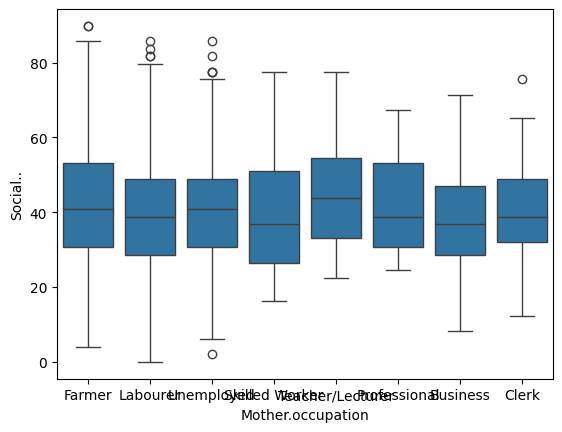

In [152]:
parent_col = ['Father.edu','Mother.edu','Father.occupation','Mother.occupation']
subject_col = ['Maths..','Reading..','Science..','Social..']
for col1 in parent_col:
    for col2 in subject_col:
        print("Boxplot of", col1, "vs", col2)
        sns.boxplot(x=nas[col1],y=nas[col2])
        plt.show()

In [153]:
curr = pd.read_csv("currencies.csv")

In [154]:
#df = pd.DataFrame('Indian Rupee', columns=['Australian Dollar','U.S. Dollar','Japanese Yen','Euro'])
curr.head(3)

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938


In [156]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Currency                    11 non-null     object 
 1   Chinese Yuan                11 non-null     float64
 2   Euro                        11 non-null     float64
 3   Japanese Yen                10 non-null     float64
 4   U.K. Pound Sterling         11 non-null     float64
 5   U.S. Dollar                 11 non-null     float64
 6   Algerian Dinar              9 non-null      float64
 7   Australian Dollar           11 non-null     float64
 8   Bahrain Dinar               11 non-null     float64
 9   Botswana Pula               9 non-null      float64
 10  Brazilian Real              11 non-null     float64
 11  Brunei Dollar               10 non-null     float64
 12  Canadian Dollar             10 non-null     float64
 13  Chilean Peso                11 non-nu

In [158]:
print(curr.dtypes)

Currency                       object
Chinese Yuan                  float64
Euro                          float64
Japanese Yen                  float64
U.K. Pound Sterling           float64
U.S. Dollar                   float64
Algerian Dinar                float64
Australian Dollar             float64
Bahrain Dinar                 float64
Botswana Pula                 float64
Brazilian Real                float64
Brunei Dollar                 float64
Canadian Dollar               float64
Chilean Peso                  float64
Colombian Peso                 object
Czech Koruna                  float64
Danish Krone                  float64
Hungarian Forint              float64
Icelandic Krona               float64
Indian Rupee                  float64
Indonesian Rupiah              object
Iranian Rial                   object
Israeli New Sheqel            float64
Kazakhstani Tenge             float64
Korean Won                     object
Kuwaiti Dinar                 float64
Libyan Dinar

In [159]:
numeric_columns = curr.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

In [160]:
print(correlation_matrix)

                            Chinese Yuan      Euro  Japanese Yen  \
Chinese Yuan                    1.000000  0.151596      0.117566   
Euro                            0.151596  1.000000     -0.645719   
Japanese Yen                    0.117566 -0.645719      1.000000   
U.K. Pound Sterling             0.108695  0.531150     -0.970308   
U.S. Dollar                     0.291582 -0.210587      0.210295   
Algerian Dinar                  0.815216  0.259964     -0.388099   
Australian Dollar               0.077983  0.331588     -0.582032   
Bahrain Dinar                   0.291926 -0.209926      0.209957   
Botswana Pula                   0.467693  0.469668     -0.627015   
Brazilian Real                  0.320508  0.383645     -0.641122   
Brunei Dollar                   0.499400  0.103766     -0.260258   
Canadian Dollar                -0.186643  0.638422     -0.662233   
Chilean Peso                    0.028821  0.242743     -0.809751   
Czech Koruna                   -0.000742  0.9521

In [161]:
numeric_columns.corr()

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,0.815216,0.077983,0.291926,0.467693,0.320508,...,0.356889,0.296118,-0.044773,-0.069368,0.585148,0.215925,0.542852,0.291300,0.421574,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,0.259964,0.331588,-0.209926,0.469668,0.383645,...,0.382248,-0.234048,0.756618,0.277528,0.370282,-0.621466,0.257016,-0.210770,-0.047889,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-0.388099,-0.582032,0.209957,-0.627015,-0.641122,...,-0.629790,0.216936,-0.484786,0.209928,-0.458043,0.952893,-0.147436,0.210296,-0.513065,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,0.613186,0.579213,-0.042220,0.689069,0.731765,...,0.691677,-0.063891,0.439605,-0.274110,0.484703,-0.884769,0.379161,-0.042522,0.512847,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,0.822036,0.607010,0.999999,0.580842,-0.340426,...,0.596483,0.999985,-0.671798,-0.734504,0.457371,0.135467,-0.481887,0.999999,0.665831,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000,0.908465,0.822349,0.883366,0.401592,...,0.910574,0.872504,-0.157963,-0.561866,0.917543,-0.321122,0.600139,0.821881,0.601316,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,0.908465,1.000000,0.607349,0.957234,0.071958,...,0.913906,0.687806,-0.067537,-0.651600,0.769542,-0.504815,-0.677335,0.607053,0.710815,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,0.822349,0.607349,1.000000,0.581435,-0.340569,...,0.596910,0.999984,-0.671219,-0.734555,0.457699,0.135350,-0.482659,0.999999,0.666037,0.999999
Botswana Pula,0.467693,0.469668,-0.627015,0.689069,0.580842,0.883366,0.957234,0.581435,1.000000,0.220811,...,0.977147,0.671245,-0.068228,-0.707980,0.725779,-0.575553,-0.344260,0.580858,0.861270,0.581198
Brazilian Real,0.320508,0.383645,-0.641122,0.731765,-0.340426,0.401592,0.071958,-0.340569,0.220811,1.000000,...,0.249574,-0.348204,0.604634,0.172026,0.448202,-0.449111,0.935040,-0.340725,-0.001463,-0.340619


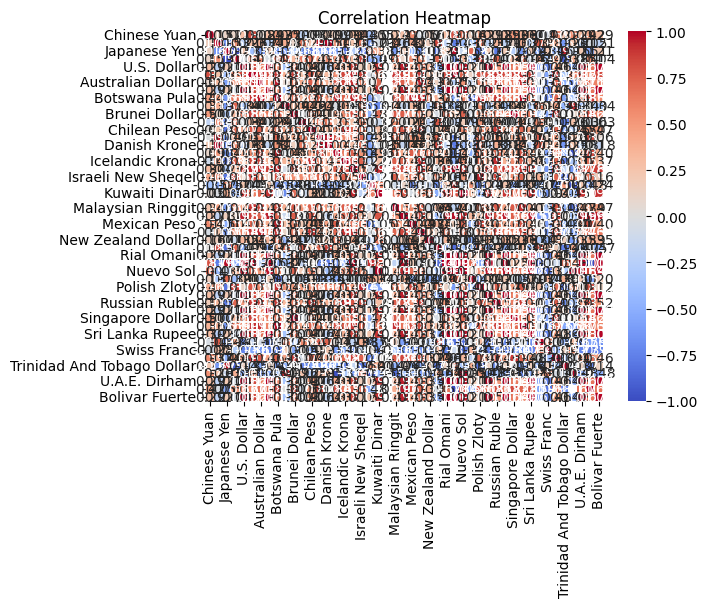

In [162]:
numeric_columns = curr.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

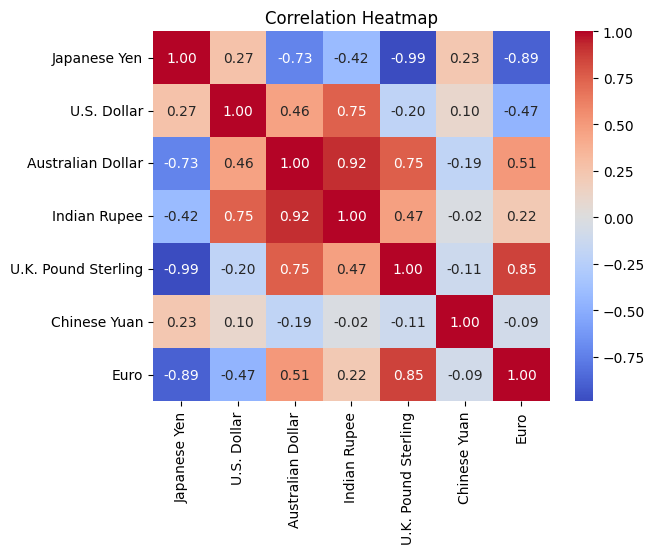

Correlation between currencies:
                     Japanese Yen  U.S. Dollar  Australian Dollar  \
Japanese Yen             1.000000     0.269027          -0.726414   
U.S. Dollar              0.269027     1.000000           0.457791   
Australian Dollar       -0.726414     0.457791           1.000000   
Indian Rupee            -0.415149     0.750276           0.920240   
U.K. Pound Sterling     -0.986639    -0.196783           0.752180   
Chinese Yuan             0.232157     0.095295          -0.191042   
Euro                    -0.891213    -0.465660           0.505847   

                     Indian Rupee  U.K. Pound Sterling  Chinese Yuan      Euro  
Japanese Yen            -0.415149            -0.986639      0.232157 -0.891213  
U.S. Dollar              0.750276            -0.196783      0.095295 -0.465660  
Australian Dollar        0.920240             0.752180     -0.191042  0.505847  
Indian Rupee             1.000000             0.467762     -0.020650  0.217672  
U.K. Pound

In [166]:
numeric_columns = curr.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()


# Plot correlation matrix using seaborn


# Calculate correlation between specific currencies
currency_select = numeric_columns[['Japanese Yen', 'U.S. Dollar', 'Australian Dollar', 'Indian Rupee', 'U.K. Pound Sterling', 'Chinese Yuan', 'Euro']].corr()
currency_corr = currency_select.corr()


sns.heatmap(currency_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print("Correlation between currencies:")
print(currency_corr)

In [168]:
#numeric_columns = curr.select_dtypes(include=['float64', 'int64'])
#correlation_matrix = numeric_columns.corr()


# Plot correlation matrix using seaborn


# Calculate correlation between specific currencies
col1_select = nas[['Mother.edu','Siblings']].corr()
col1_corr = col1_select.corr()


sns.heatmap(col1_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print("Correlation between currencies:")
print(col1_corr)

ValueError: could not convert string to float: 'Illiterate'

In [174]:
cust_rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GvOkzy5MLdy9zJ8vXMArwpRvN/rating_final.csv')

cust_rating['avg_rating'] = round((cust_rating['rating'] + cust_rating['food_rating'] + cust_rating['service_rating']) / 3, 0)

print(cust_rating.head(10))

  userID  placeID  rating  food_rating  service_rating  avg_rating
0  U1077   135085       2            2               2         2.0
1  U1077   135038       2            2               1         2.0
2  U1077   132825       2            2               2         2.0
3  U1077   135060       1            2               2         2.0
4  U1068   135104       1            1               2         1.0
5  U1068   132740       0            0               0         0.0
6  U1068   132663       1            1               1         1.0
7  U1068   132732       0            0               0         0.0
8  U1068   132630       1            1               1         1.0
9  U1067   132584       2            2               2         2.0


In [170]:
cust_rating.head(3)

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2


In [179]:
order = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/0gjkvLLgNdQLqG10jo5yyJyjK/orders_dimen.csv')
order['Order_Date'] = pd.to_datetime(order['Order_Date'])
order['day']= order['Order_Date'].dt.day
print(order.head(3))


   Order_ID Order_Date Order_Priority Ord_id  day
0         3 2010-10-13            LOW  Ord_1   13
1       293 2012-10-01           HIGH  Ord_2    1
2       483 2011-07-10           HIGH  Ord_3   10
